In [2]:
import librosa, librosa.display
import matplotlib.pyplot as plt

In [3]:
file = "mission_impossible.mp3"

/home/abhinav/anaconda3/envs/d2l/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


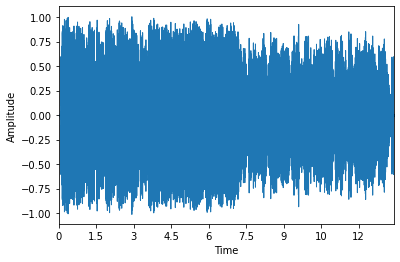

In [4]:
#Waveform
signal, sr = librosa.load(file,sr = 22050) #sr * T = 22050*30
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

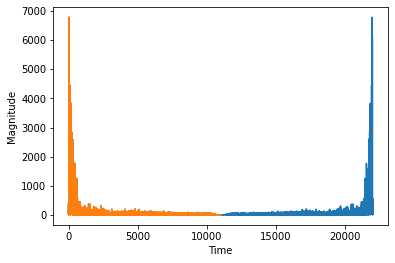

In [11]:
import numpy as np

#fft - fast fourier transform -> Spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))
plt.plot(frequency,magnitude)

# Only half of the above curve is required therefore
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency,left_magnitude)

plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()

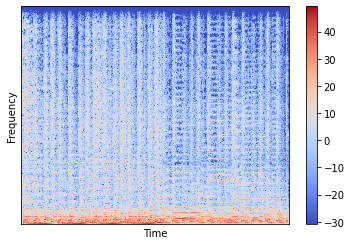

In [15]:
#stft - short time fourier transform

n_fft = 2048  # amount of samples
hop_length = 512  # amount we are shifting to the right
stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = n_fft)

spectrogram = np.abs(stft)

# librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_length)
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.colorbar()
# plt.show()

#for better visualisation we take log of the amplitudes and convert them into decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


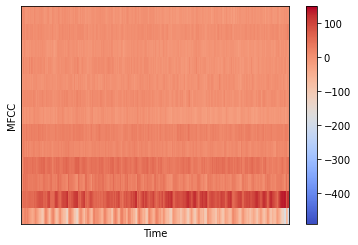

In [17]:
#MFFCs

MFFCs = librosa.feature.mfcc(signal,n_fft = n_fft,hop_length = hop_length,n_mfcc= 13)

librosa.display.specshow(MFFCs, sr = sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()